# HW-4

Implement the back-propagation algorithm to learn the weights of a multi layer perceptron with 2 input nodes, 2 hidden nodes and 1 output node. Train your network to learn the following binary operations:

- XOR
- AND
- OR


In [21]:
import numpy as np
import matplotlib.pyplot as plt


def frequency_histogram(data):
    plt.hist(data, bins=100)
    plt.show()


def sigmod(x):
    return 1 / (1 + np.exp(-x))


def sigmod_derivative(x):
    return x * (1 - x)


def add_gaussian_noise(x: int, sigma: float) -> float:
    return float(x + np.random.normal(0, sigma))


def generate_training_data(
    N: int, sigma: float, inputs: np.ndarray, targets: np.ndarray
) -> np.ndarray:
    training_inputs = np.zeros((N, 2))
    training_outputs = np.zeros((N, 1))
    for i in range(N):
        rand = np.random.randint(4)
        training_inputs[i] = np.array(
            [
                add_gaussian_noise(inputs[rand][0], sigma),
                add_gaussian_noise(inputs[rand][1], sigma),
            ]
        )
        training_outputs[i] = targets[rand]

    return training_inputs, training_outputs


In [22]:
def main(
    N: int,
    m: int,
    sigma: float,
    epochs: int,
    learning_rate: float,
    default_inputs: np.ndarray,
    default_targets: np.ndarray,
    chart_label: str = "",
):
    input_nodes = 2
    hidden_nodes = 2
    output_nodes = 1

    hidden_weights = np.random.rand(input_nodes, hidden_nodes)
    output_weights = np.random.rand(hidden_nodes, output_nodes)

    hidden_bias = np.random.rand(1, hidden_nodes)
    output_bias = np.random.rand(1, output_nodes)

    inputs, targets = generate_training_data(N, sigma, default_inputs, default_targets)
    input_batches = np.array_split(inputs[: int(0.8 * N)], m)
    target_batches = np.array_split(targets[: int(0.8 * N)], m)

    training_loss = np.zeros(epochs)
    testing_loss = np.zeros(epochs)

    for i in range(epochs):
        for (_inputs, _targets) in zip(input_batches, target_batches):
            hidden_layer_activation = np.dot(_inputs, hidden_weights) + hidden_bias
            hidden_layer_output = sigmod(hidden_layer_activation)

            output_layer_activation = (
                np.dot(hidden_layer_output, output_weights) + output_bias
            )
            output_layer_output = sigmod(output_layer_activation)

            error = _targets - output_layer_output

            d_predicted = error * sigmod_derivative(output_layer_output)
            error_in_hidden_layer = d_predicted.dot(output_weights.T)
            d_hidden = error_in_hidden_layer * sigmod_derivative(hidden_layer_output)

            output_weights += hidden_layer_output.T.dot(d_predicted) * learning_rate
            output_bias += np.sum(d_predicted, axis=0, keepdims=True) * learning_rate
            hidden_weights += _inputs.T.dot(d_hidden) * learning_rate
            hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

        error = []
        for (j, o) in enumerate(output_layer_output):
            error.append(np.abs(o[0] - _targets[j][0]) ** 2)
        training_loss[i] = np.mean(error)

        testing_data = inputs[int(0.8 * N) :]
        testing_targets = targets[int(0.8 * N) :]

        _hidden_layer_activation = np.dot(testing_data, hidden_weights) + hidden_bias
        _hidden_layer_output = sigmod(_hidden_layer_activation)

        _output_layer_activation = (
            np.dot(_hidden_layer_output, output_weights) + output_bias
        )
        _output_layer_output = sigmod(_output_layer_activation)

        error = []
        for (j, o) in enumerate(_output_layer_output):
            error.append(np.abs(o[0] - testing_targets[j][0]) ** 2)
        testing_loss[i] = np.mean(error)

    print(f"w1={hidden_weights}, b1={hidden_bias}")
    print(f"w2={output_weights}, b2={output_bias}")

    plt.plot(training_loss)
    plt.plot(testing_loss)
    plt.legend(["Training", "Testing"])
    plt.gcf().set_size_inches(15, 10)
    plt.title(chart_label)
    plt.show()


w1=[[5.81507391 3.56103854]
 [6.03715935 3.63967589]], b1=[[-2.47561813 -5.50684712]]
w2=[[ 7.46095564]
 [-8.13552148]], b2=[[-3.33695829]]


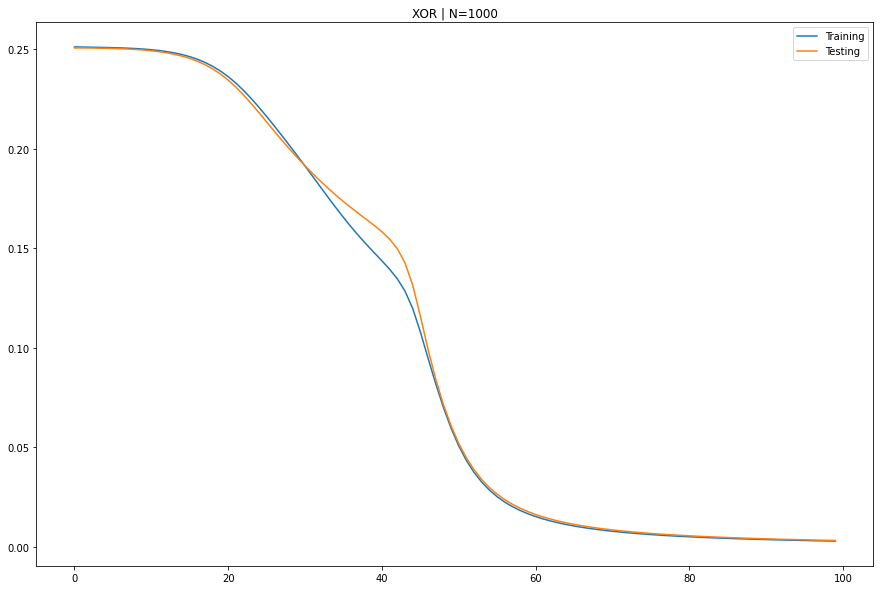

w1=[[3.33360983 6.63408464]
 [3.22635581 5.7155297 ]], b1=[[-4.95827436 -2.37137715]]
w2=[[-7.73670513]
 [ 7.12166446]], b2=[[-3.19185549]]


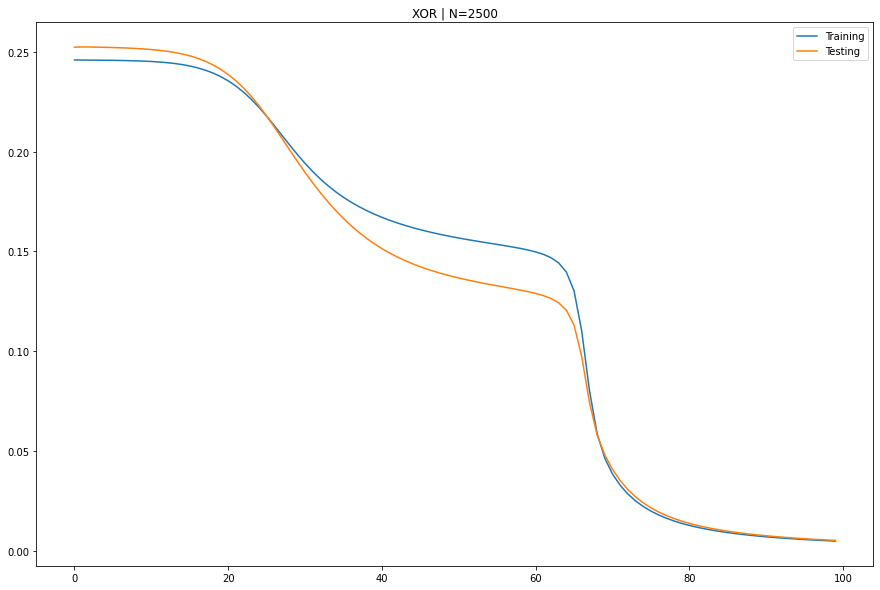

w1=[[5.75133747 3.61144053]
 [5.93220225 3.60560829]], b1=[[-2.44816129 -5.51669092]]
w2=[[ 7.37426165]
 [-8.05645866]], b2=[[-3.29941628]]


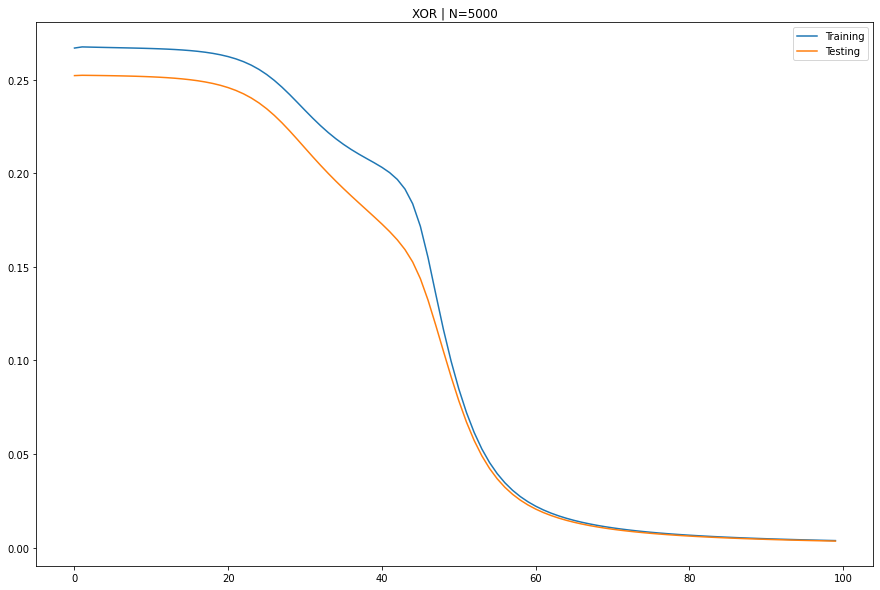

In [23]:
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [1], [1], [0]]),
    f"XOR | N={1000}",
)
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [1], [1], [0]]),
    f"XOR | N={2500}",
)
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [1], [1], [0]]),
    f"XOR | N={5000}",
)


# XOR Analysis

- XOR's rate of convergence is a hit or a miss sometimes. However, on training it for more epochs, we approach a stable state eventually.
- There is no overfitting or underfitting observed here


w1=[[3.83075375 0.74086015]
 [3.8108159  0.02463124]], b1=[[-5.59179076  1.03323047]]
w2=[[ 8.63905681]
 [-0.58736125]], b2=[[-4.15532156]]


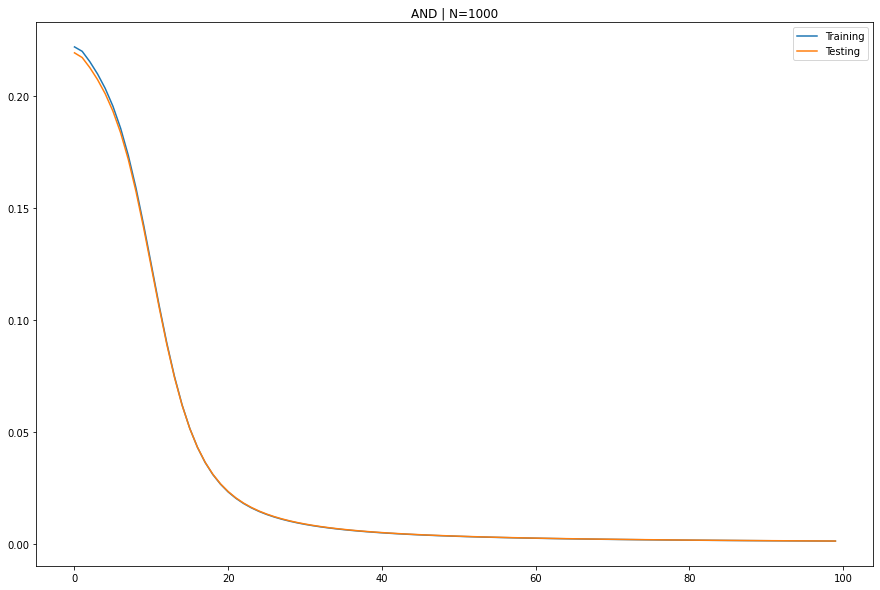

w1=[[-1.28251264  3.61173595]
 [-1.26126465  3.54917455]], b1=[[ 1.57280538 -5.22631386]]
w2=[[-2.65769451]
 [ 8.14917064]], b2=[[-3.22447833]]


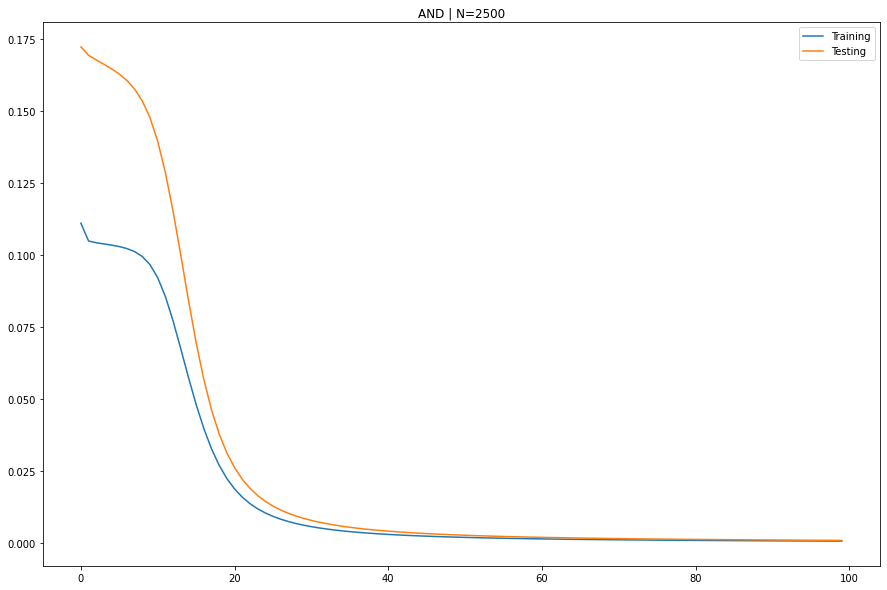

w1=[[ 3.0792413  -2.20276387]
 [ 3.04035018 -2.26852369]], b1=[[-4.33292165  3.01259734]]
w2=[[ 7.01722405]
 [-4.81023506]], b2=[[-1.86539116]]


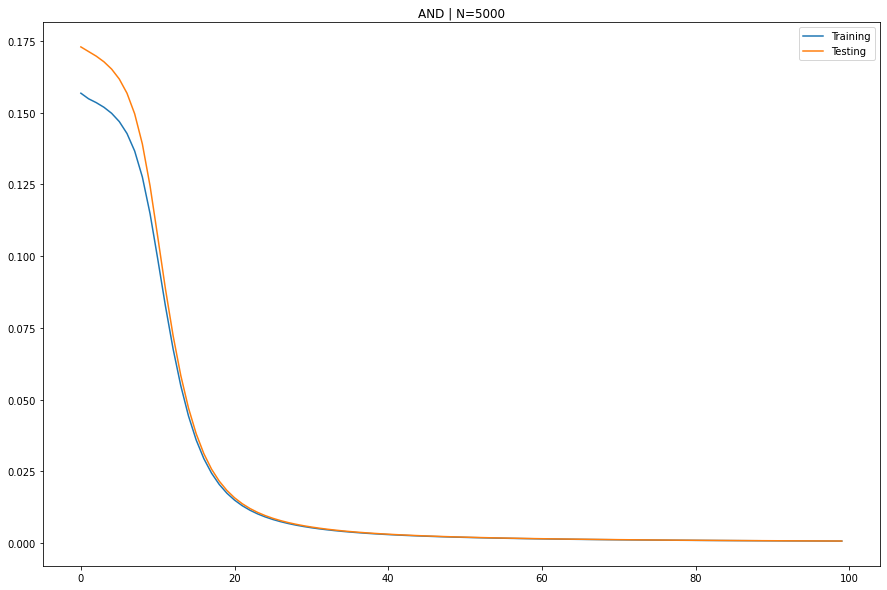

In [24]:
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [0], [0], [1]]),
    f"AND | N={1000}",
)
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [0], [0], [1]]),
    f"AND | N={2500}",
)
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [0], [0], [1]]),
    f"AND | N={5000}",
)


# AND Analysis

- AND's rate of convergence is a steep slope. We converge very fast to a stable state.
- There is no overfitting or underfitting observed here


w1=[[3.75947018 3.11206201]
 [3.79495461 3.1475217 ]], b1=[[-2.06734433 -1.76356498]]
w2=[[5.58199074]
 [4.2618413 ]], b2=[[-4.37820613]]


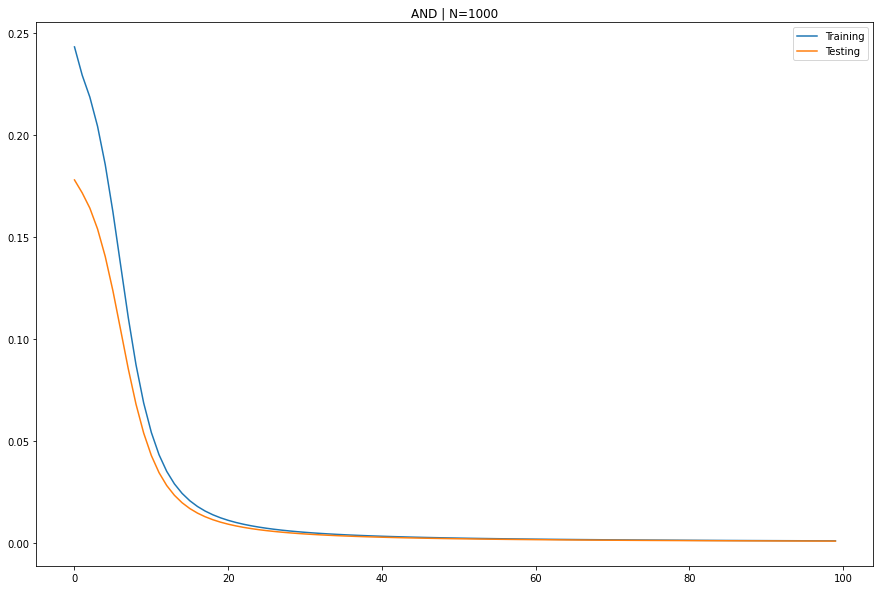

w1=[[3.9996946  2.76950741]
 [4.08960601 2.64306167]], b1=[[-2.1710274  -1.53265205]]
w2=[[6.25067276]
 [3.47253045]], b2=[[-4.32694507]]


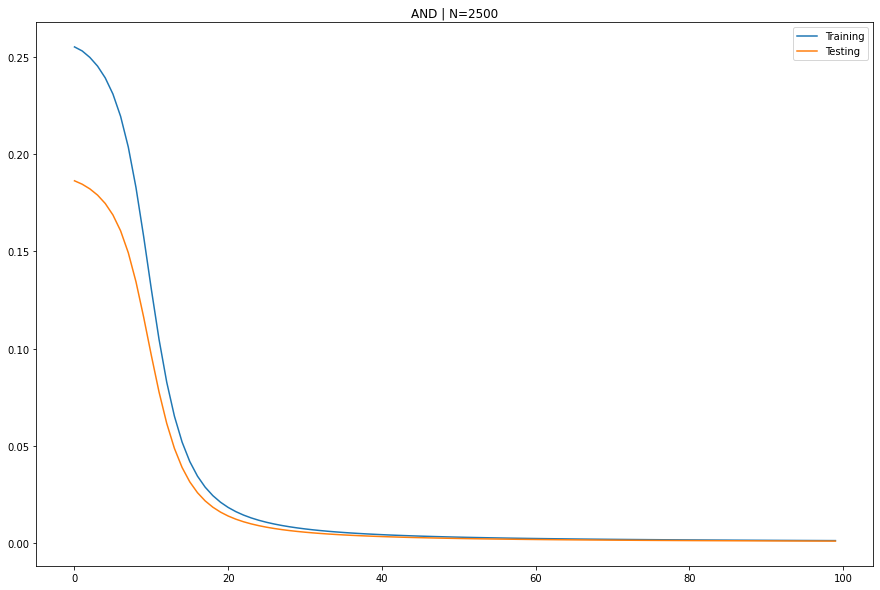

w1=[[4.20712013 2.35841404]
 [4.37250107 2.20398196]], b1=[[-2.28923541 -1.29158636]]
w2=[[6.91480546]
 [2.69126074]], b2=[[-4.356183]]


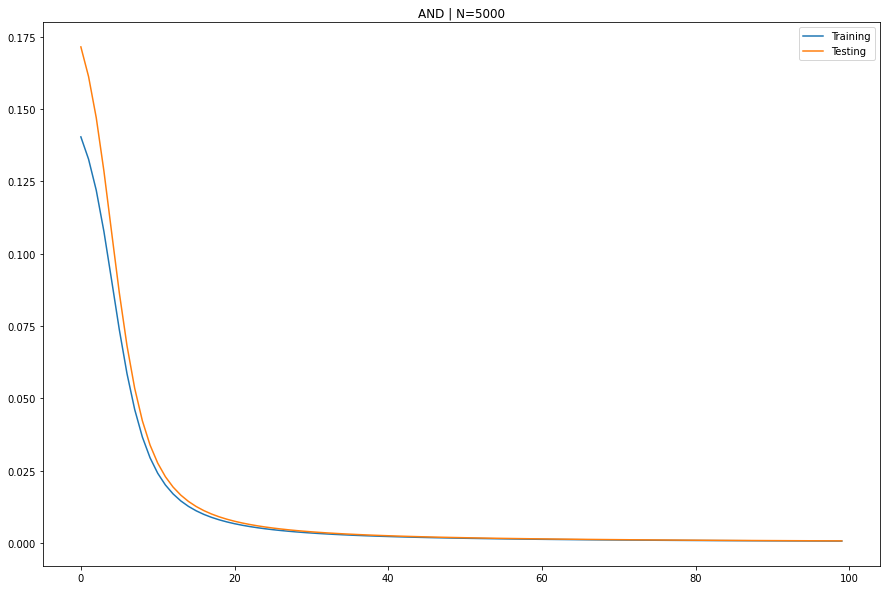

In [20]:
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [1], [1], [1]]),
    f"AND | N={1000}",
)
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [1], [1], [1]]),
    f"AND | N={2500}",
)
main(
    1000,
    50,
    0.02,
    100,
    0.05,
    np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
    np.array([[0], [1], [1], [1]]),
    f"AND | N={5000}",
)


# OR Analysis

- OR's rate of convergence is also a steep slope. We converge very fast to a stable state.
- There is no overfitting or underfitting observed here
